# Bank Marketing for Clients to Subscribe

### Loading libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score, KFold

## 1. Business Problem 

One of the business process of banks is to market their products and services in order to retain current or acquire potential customers. For example, banks can market their services to have customers subscribe to a term deposit or a loan, or any other campaign. But how the bank should design their strategy in order to successfully acquire those customer is partially sought in the data. 

## 2. About the dataset

The dataset is about direct marketing campaigns (phone calls) of a Portuguese bank. The classification goal is to predict if the client will subscribe to a term deposit (y). The file chosen has 4521 rows and 17 columns (16 features of the client's data and 1 outcome variable). There are no missing values. 

Before processing the dataset to check for the datatypes understood by Python, the following are their dataypes by virtue of the nature of the definition. 

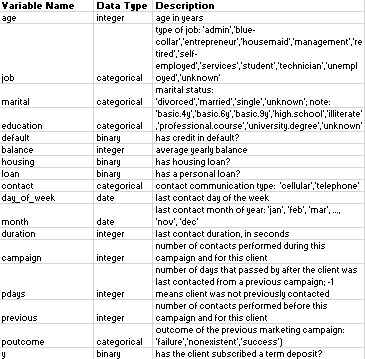

## 3.1. Importing the dataset

In [4]:
dataset_name = input('Name of the dataset: ')

Name of the dataset: bank_marketing.csv


In [5]:
def read_csv(dataset_name):
    original_data = pd.read_csv(dataset_name, sep = ';', header = 0)
    return original_data

## 3.2. Dimensions of the dataset

In [6]:
def dimensions(dataset_name):
    dim = read_csv(dataset_name).shape
    return dim

In [7]:
dimensions(dataset_name)

(4521, 17)

## 4. Conversion of datatypes of variables

### 4.1. Original datatypes of the variables from Python

In [8]:
def data_types(dataset_name):
    return read_csv(dataset_name).dtypes

In [9]:
data_types(dataset_name)

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

### 4.2. Conversion of datatypes through Label Encoding

In [10]:
def preprocess_data(dataset_name):
    data = read_csv(dataset_name)
    has_object = any(data.dtypes == 'object')
    has_bool = any(data.dtypes == 'bool')
    
    if has_object or has_bool:
        label_encoder = LabelEncoder()
        for col in data.columns:
            if data[col].dtype == 'object' or data[col].dtype == 'bool':
                data[col] = label_encoder.fit_transform(data[col])
        processed_data = data
    else:
        processed_data = data
    
    return processed_data


In [11]:
preprocess_data(dataset_name).dtypes

age          int64
job          int32
marital      int32
education    int32
default      int32
balance      int64
housing      int32
loan         int32
contact      int32
day          int64
month        int32
duration     int64
campaign     int64
pdays        int64
previous     int64
poutcome     int32
y            int32
dtype: object

In this dataset, the variables detected as object are converted to integer.  

## 5. Missing Values Detection

In [12]:
def missing_vals(dataset_name):
    return preprocess_data(dataset_name).isna().sum()

In [13]:
missing_vals(dataset_name)

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

There are no missing values in this dataset.

## 6. Descriptive Summary Stats of Dataset

In [14]:
def descr(dataset_name):
    return preprocess_data(dataset_name).describe().applymap('{:.2f}'.format)

In [15]:
descr(dataset_name)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,4521.00,4521.00,4521.00,4521.00,4521.00,4521.00,4521.00,4521.00,4521.00,4521.00,4521.00,4521.00,4521.00,4521.00,4521.00,4521.00,4521.00
mean,41.17,4.41,1.15,1.23,0.02,1422.66,0.57,0.15,0.65,15.92,5.54,263.96,2.79,39.77,0.54,2.56,0.12
std,10.58,3.26,0.60,0.75,0.13,3009.64,0.50,0.36,0.90,8.25,3.00,259.86,3.11,100.12,1.69,0.99,0.32
min,19.00,0.00,0.00,0.00,0.00,-3313.00,0.00,0.00,0.00,1.00,0.00,4.00,1.00,-1.00,0.00,0.00,0.00
25%,33.00,1.00,1.00,1.00,0.00,69.00,0.00,0.00,0.00,9.00,3.00,104.00,1.00,-1.00,0.00,3.00,0.00
50%,39.00,4.00,1.00,1.00,0.00,444.00,1.00,0.00,0.00,16.00,6.00,185.00,2.00,-1.00,0.00,3.00,0.00
75%,49.00,7.00,2.00,2.00,0.00,1480.00,1.00,0.00,2.00,21.00,8.00,329.00,3.00,-1.00,0.00,3.00,0.00
max,87.00,11.00,2.00,3.00,1.00,71188.00,1.00,1.00,2.00,31.00,11.00,3025.00,50.00,871.00,25.00,3.00,1.00


### 6.1. Interpretation of Summary Stats

The average balance of the client is 1422 dollars, whereas the average duration of contact with a client is about 264 seconds which is close to 4.5 minutes. Further, on average 2-3 calls are run for a client during the campaign. 

However, if compared to processes for a previous marketing campaign, on averag 40 days pass by since the last contact. 

## 7. Boxplots

In [16]:
def extract_numeric_cols(dataset_name):
    return preprocess_data(dataset_name).select_dtypes(include=['int64', 'float64', 'int32']).columns.tolist()

In [17]:
extract_numeric_cols(dataset_name)

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'y']

### 7.1. Boxplots Generation

In [18]:
def boxplots(dataset_name):
    numeric_columns = extract_numeric_cols(dataset_name)
    fig, axs = plt.subplots(1, len(numeric_columns), figsize=(30, 16))

    for i, col in enumerate(numeric_columns):
        axs[i].boxplot(preprocess_data(dataset_name)[col])
        axs[i].set_title(col)

    plt.tight_layout()
    plt.show()

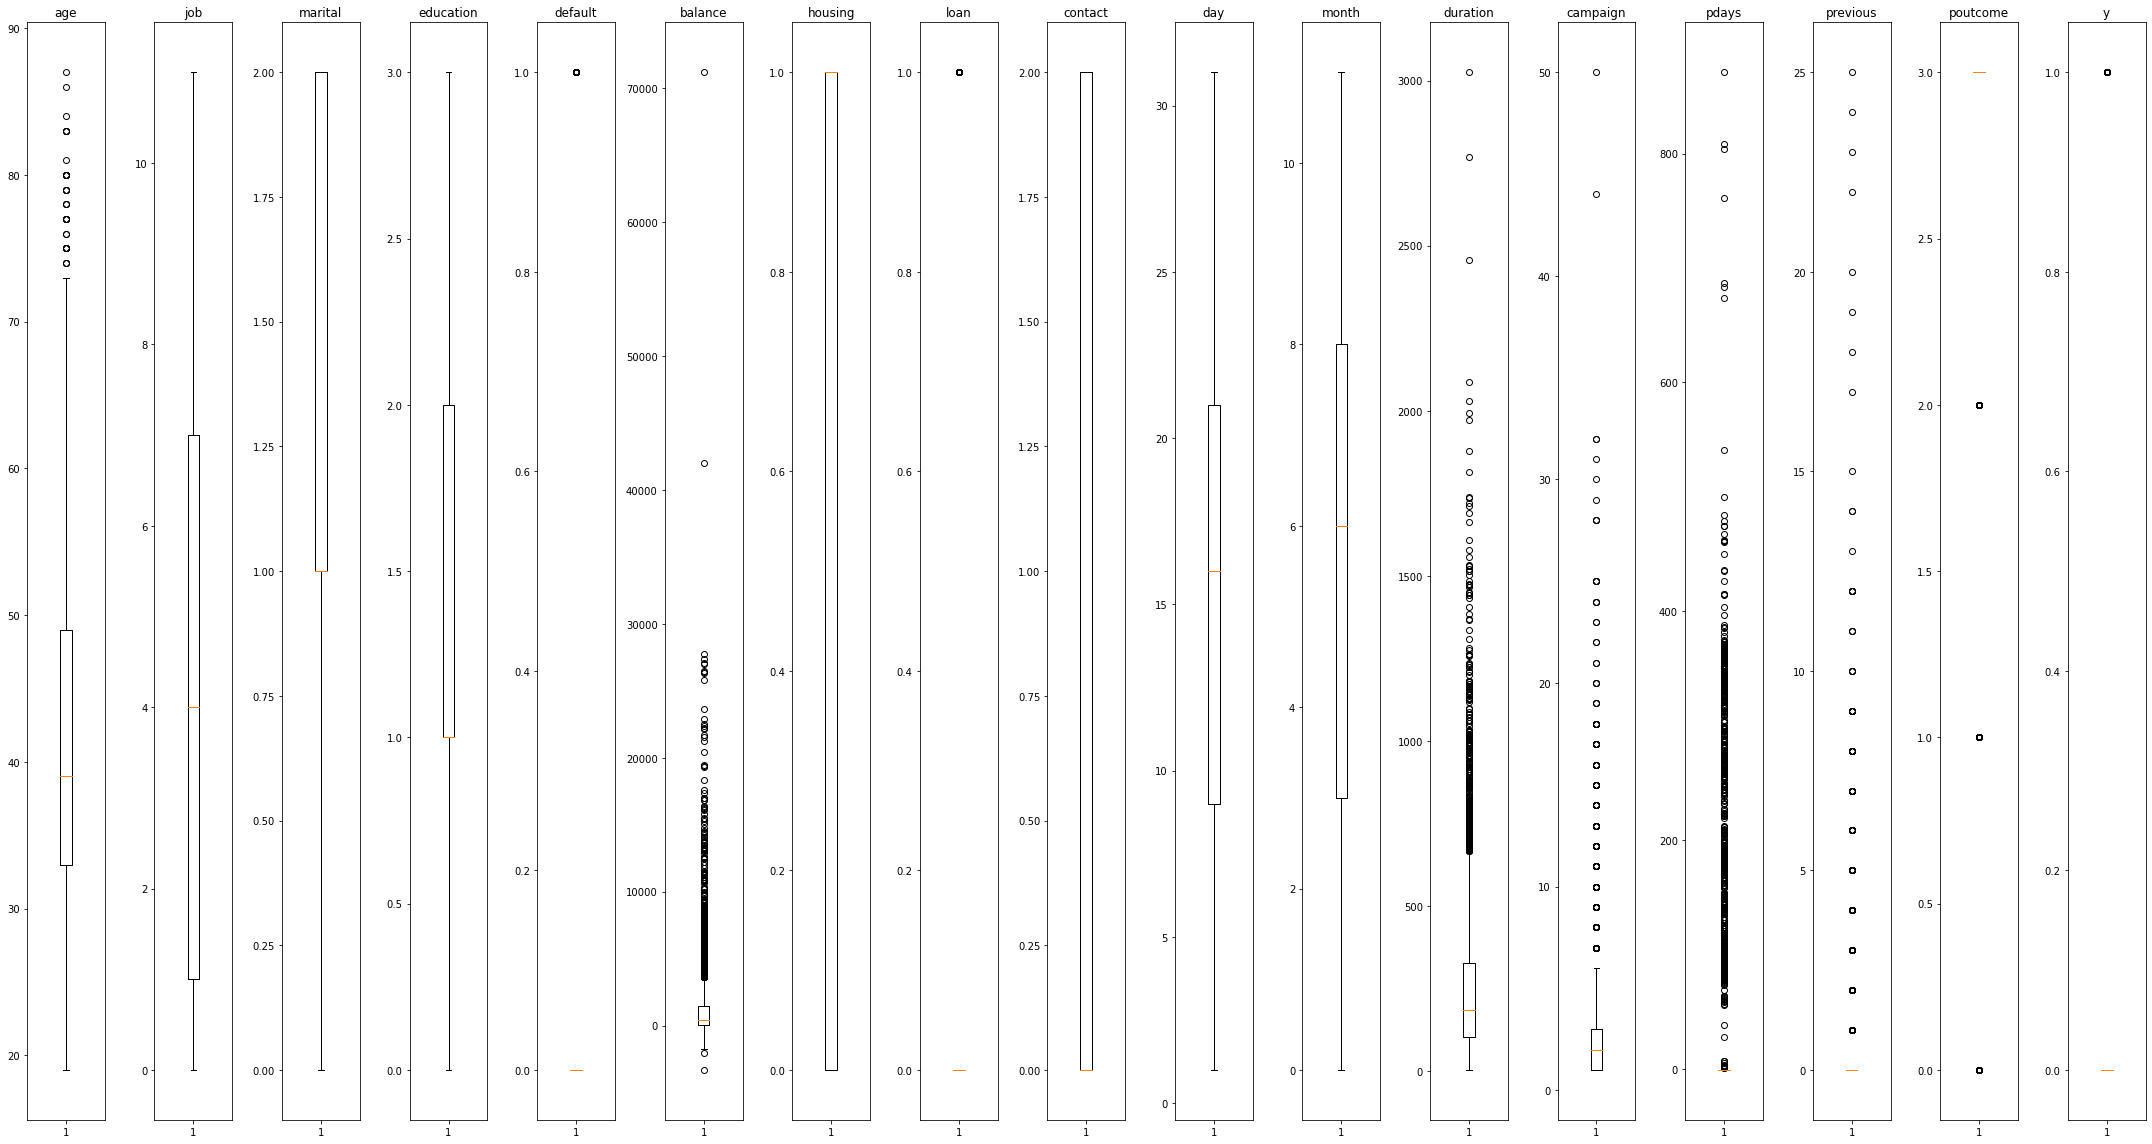

In [19]:
boxplots(dataset_name)

### 7.1.1. Interpretation of Boxplots

The boxplots show that outliers exist in a few of the variables such as balance and duration. If we observe the boxplots of campaign and previous, it is clear by tail length that in previous, fewer calls were made. 

### 7.2. Boxplot Stats

In [20]:
def boxplot_stats(dataset_name):
    column_names = extract_numeric_cols(dataset_name)
    boxplot_stats_list = []
    for column_name in column_names:

        minimum = min(preprocess_data(dataset_name)[column_name])
        maximum = max(preprocess_data(dataset_name)[column_name])
        
        q1 = np.percentile(preprocess_data(dataset_name)[column_name], 25)
        q2 = np.percentile(preprocess_data(dataset_name)[column_name], 50)
        q3 = np.percentile(preprocess_data(dataset_name)[column_name], 75)

        iqr = q3 - q1

        whisker_low = q1 - 1.5 * iqr
        whisker_high = q3 + 1.5 * iqr

        boxplot_stats_list.append({
            'column_name': column_name,
            'whisker_low': whisker_low,
            'min': minimum,
            'q1': q1,
            'q2': q2,
            'q3': q3,
            'whisker_high': whisker_high,
            'max': maximum,
            'iqr': iqr
        })
        
    boxplot_stats_df = pd.DataFrame(boxplot_stats_list).set_index('column_name')
    return boxplot_stats_df.applymap('{:.2f}'.format)

In [21]:
boxplot_stats(dataset_name)

,whisker_low,min,q1,q2,q3,whisker_high,max,iqr
column_name,,,,,,,,
age,9.00,19.00,33.00,39.00,49.00,73.00,87.00,16.00
job,-8.00,0.00,1.00,4.00,7.00,16.00,11.00,6.00
marital,-0.50,0.00,1.00,1.00,2.00,3.50,2.00,1.00
education,-0.50,0.00,1.00,1.00,2.00,3.50,3.00,1.00
default,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
balance,-2047.50,-3313.00,69.00,444.00,1480.00,3596.50,71188.00,1411.00
housing,-1.50,0.00,0.00,1.00,1.00,2.50,1.00,1.00
loan,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
contact,-3.00,0.00,0.00,0.00,2.00,5.00,2.00,2.00


It is clear that all the true numeric variables have datapoints that fall outside of the IQR which was identified from the boxplots as well.

### Class Variable Name

In [22]:
def class_var_name():
    class_variable = input('What is the name of the class column? ')
    return class_variable

In [23]:
class_variable = class_var_name()

What is the name of the class column? y


## 8. Bar and Frequency plots

In [27]:
def cols_for_freq_plots():
    columns_list = input('Enter column names separated by commas: ').split(', ')
    return columns_list

In [28]:
cols_for_freq_plots = cols_for_freq_plots()

Enter column names separated by commas: marital, default, housing, loan, poutcome, y


In [29]:
def frequency_plots(dataset_name, class_variable, cols_for_freq_plots):
    dataset = read_csv(dataset_name)
    num_plots = len(cols_for_freq_plots)
    num_cols = 2
    num_rows = (num_plots + num_cols - 1) // num_cols
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 6*num_rows))

    if num_rows == 1:
        axes = [axes]
    
    for idx, col in enumerate(cols_for_freq_plots):
        row_idx = idx // num_cols
        col_idx = idx % num_cols
        
        ax = axes[row_idx][col_idx]

        sns.countplot(x=col, data=dataset, ax=ax)
        ax.set_title(f'Frequency Plot of {col}')
        ax.set_xlabel(col)
        ax.set_ylabel('Count')
        
    plt.tight_layout()
    plt.show()

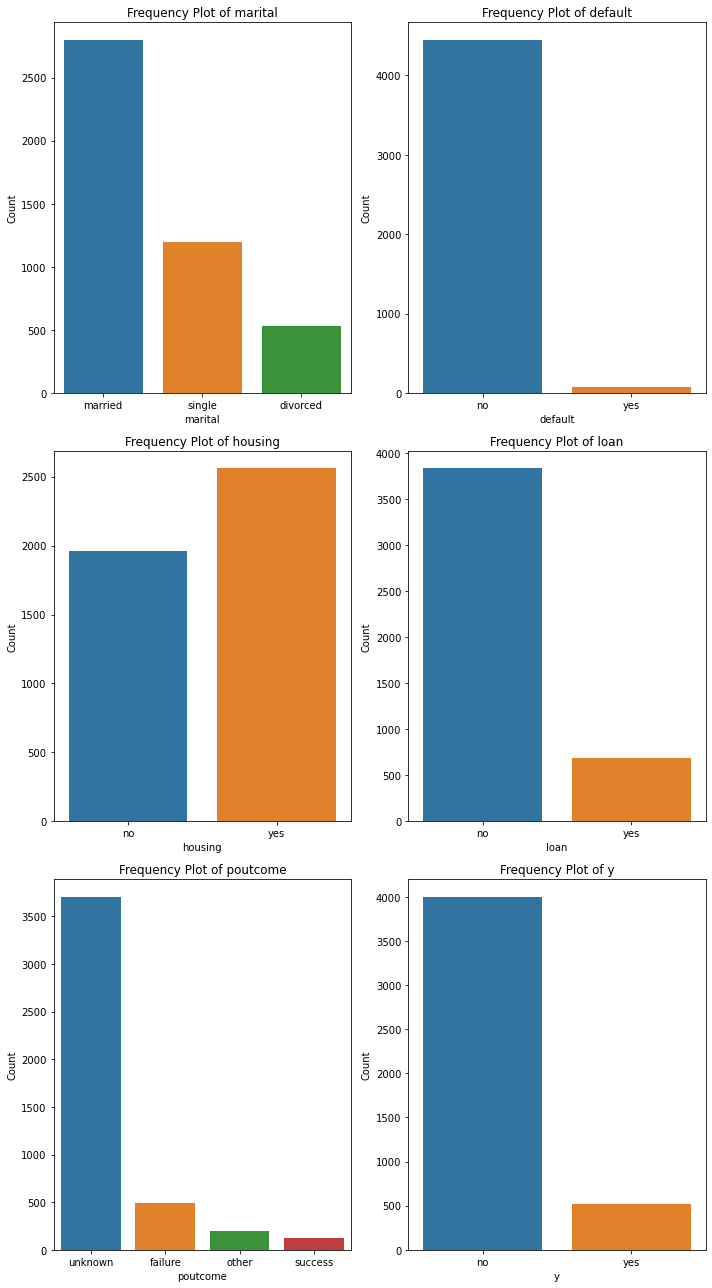

In [30]:
frequency_plots(dataset_name, class_variable, cols_for_freq_plots)

### 8.1. Interpretation of Frequency Plots

There are several inherently categorical variables in this dataset; their specific interpretations are as follows:

1) Again, the class variable is imbalanced. There are far many clients who will not subscribe to a term deposit

2) Majority clients are married

3) Majority clients don't have credit in default nor have a personal loan; however majority do have a housing loan

4) Majority of the outcomes from previous campaigns were unknown, while only a few succeeded.

In [33]:
def cat_cols():
    cat_cols = input('Enter column names separated by commas: ').split(', ')
    return cat_cols

In [34]:
categorical_cols = cat_cols()

Enter column names separated by commas: default, housing, loan, poutcome


In [35]:
def binary_categorical_barplots(dataset_name, class_variable, categorical_cols):
    dataset = read_csv(dataset_name)
    num_plots = len(categorical_cols)
    num_cols = 2
    num_rows = (num_plots + num_cols - 1) // num_cols
    
    if num_plots % 2 != 0:
        num_cols = 1
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 4*num_rows))
    
    if num_rows > 1:  
        for idx, col in enumerate(categorical_cols):
            row_idx = idx // num_cols
            col_idx = idx % num_cols

            ax = axes[row_idx][col_idx]

            sns.countplot(x=col, hue=class_variable, data=dataset, ax=ax)
            ax.set_title(f'Bar Plot of {col} vs {class_variable}')
            ax.set_xlabel(col)
            ax.set_ylabel('Count')
            ax.legend(title=class_variable)
    else:  
        for idx, col in enumerate(categorical_cols):
            ax = axes[idx]

            sns.countplot(x=col, hue=class_variable, data=dataset, ax=ax)
            ax.set_title(f'Bar Plot of {col} vs {class_variable}')
            ax.set_xlabel(col)
            ax.set_ylabel('Count')
            ax.legend(title=class_variable)
        
    plt.tight_layout()
    plt.show()

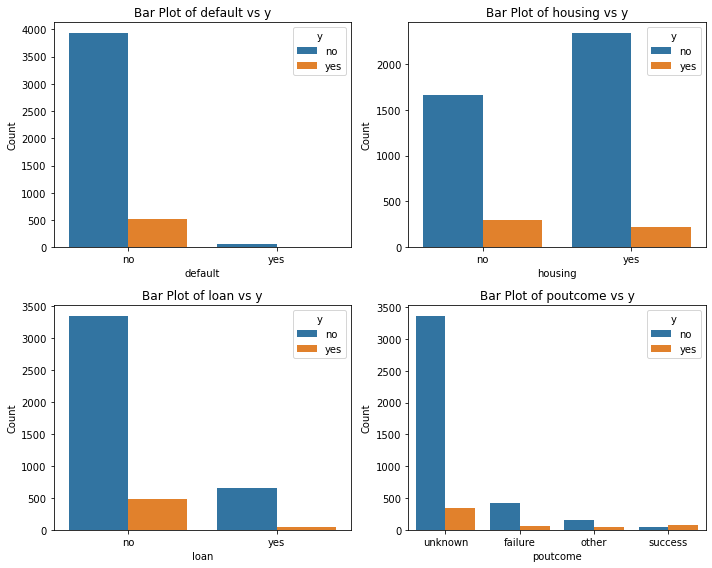

In [36]:
binary_categorical_barplots(dataset_name, class_variable, categorical_cols)

### 8.2. Interpretation of Categorical Bar Plots

For each of the categories: default, housing loan, personal loan and poutcome, majority have not subscribed to a term deposit. 

# 9. Scaling the data

Due to the values of balance being much larger than then rest of the explanatory variables, all the predictor variables have been scaled using the MinMaxScaler. 

In [37]:
def normalize_data(dataset_name, class_variable):
    processed_data = preprocess_data(dataset_name)
    
    X = processed_data.drop(columns=[class_variable])
    y = processed_data[class_variable]

    scaler = MinMaxScaler()
    X_normalized = scaler.fit_transform(X)
    
    normalized_data = pd.concat([pd.DataFrame(X_normalized, columns=X.columns), y], axis=1)
    
    return normalized_data

In [38]:
normalize_data(dataset_name, class_variable)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0.161765,0.909091,0.5,0.000000,0.0,0.068455,0.0,0.0,0.0,0.600000,0.909091,0.024826,0.000000,0.000000,0.00,1.000000,0
1,0.205882,0.636364,0.5,0.333333,0.0,0.108750,1.0,1.0,0.0,0.333333,0.727273,0.071500,0.000000,0.389908,0.16,0.000000,0
2,0.235294,0.363636,1.0,0.666667,0.0,0.062590,1.0,0.0,0.0,0.500000,0.000000,0.059914,0.000000,0.379587,0.04,0.000000,0
3,0.161765,0.363636,0.5,0.666667,0.0,0.064281,1.0,1.0,1.0,0.066667,0.545455,0.064548,0.061224,0.000000,0.00,1.000000,0
4,0.588235,0.090909,0.5,0.333333,0.0,0.044469,1.0,0.0,1.0,0.133333,0.727273,0.073486,0.000000,0.000000,0.00,1.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,0.205882,0.636364,0.5,0.333333,0.0,0.039999,1.0,0.0,0.0,0.966667,0.454545,0.107580,0.081633,0.000000,0.00,1.000000,0
4517,0.558824,0.545455,0.5,0.666667,1.0,0.000000,1.0,1.0,1.0,0.266667,0.727273,0.049321,0.000000,0.000000,0.00,1.000000,0
4518,0.558824,0.818182,0.5,0.333333,0.0,0.048429,0.0,0.0,0.0,0.600000,0.090909,0.048659,0.204082,0.000000,0.00,1.000000,0
4519,0.132353,0.090909,0.5,0.333333,0.0,0.059731,0.0,0.0,0.0,0.166667,0.272727,0.041377,0.061224,0.243119,0.12,0.333333,0


## 10. Correlation Analysis

In [39]:
def corr_heatmap(dataset_name, class_variable):
    corr_matrix = normalize_data(dataset_name, class_variable).corr()
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', annot=True, fmt='.2f', linewidths=.5)
    
    plt.title('Correlation Heatmap')
    plt.show()


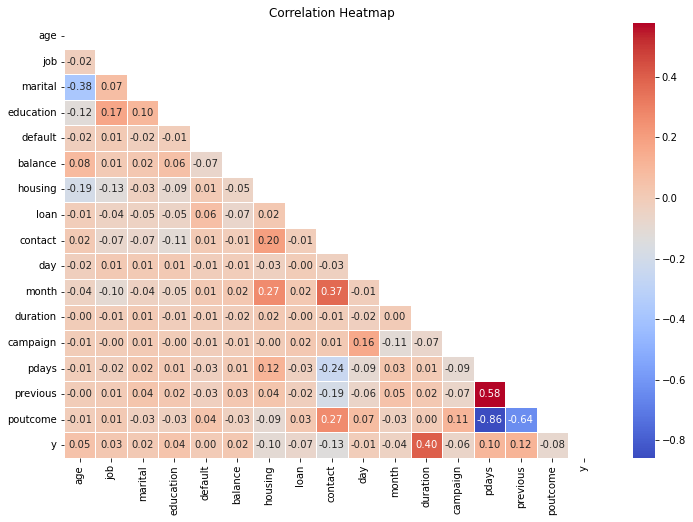

In [40]:
corr_heatmap(dataset_name, class_variable)

### 10.1. Interpretation of Correlation Heatmap

The observations from the correlation heatmap are as follows:

1) Duration has positive but moderate correlation to the target variable which means that as the duration increases, the chance to subscribe also increases. 

2) pdays is also positively correlated with previous. This makes sense because as the days after the client was last contacted increases, the bank would still continue connecting  with the last client before embarking on the new campaign and client. Hence previous would increase also. 

3) It is still unusual that other most predictor variables have a moderate to weak correlation with the target variable. 

## 11. Feature Selection 

Features have been selected through an approach using the correlations with the outcome variable. Those variables with absolute correlation between 0.1 and 1.0 with the outcome variable will be selected. Rest will be dropped. 

The idea is to choose variables with close to moderate to strong correlation with the class variable.

In [41]:
def feature_selection_by_corr(dataset_name, class_variable):
    corr_matrix = normalize_data(dataset_name, class_variable).corr()
    corr_with_target = corr_matrix[class_variable].drop(class_variable)

    ranked_features_df = pd.DataFrame({'Feature': corr_with_target.index, 'Correlation': corr_with_target.values})
    ranked_features_df.sort_values(by='Correlation', ascending=False, inplace=True)
    
    selected_features = ranked_features_df[(abs(ranked_features_df['Correlation']) >= 0.1) & (abs(ranked_features_df['Correlation']) <= 1.0)]['Feature'].tolist()
    
    return selected_features


In [42]:
feature_selection_by_corr(dataset_name, class_variable)

['duration', 'previous', 'pdays', 'housing', 'contact']

In [43]:
def drop_unselected_features(dataset_name, class_variable):
    dataset = normalize_data(dataset_name, class_variable)
    
    selected_features = feature_selection_by_corr(dataset_name, class_variable)
    selected_dataset = dataset[selected_features + [class_variable]]

    return selected_dataset

In [44]:
drop_unselected_features(dataset_name, class_variable)

,duration,previous,pdays,housing,contact,y
0,0.024826,0.00,0.000000,0.0,0.0,0
1,0.071500,0.16,0.389908,1.0,0.0,0
2,0.059914,0.04,0.379587,1.0,0.0,0
3,0.064548,0.00,0.000000,1.0,1.0,0
4,0.073486,0.00,0.000000,1.0,1.0,0
...,...,...,...,...,...,...
4516,0.107580,0.00,0.000000,1.0,0.0,0
4517,0.049321,0.00,0.000000,1.0,1.0,0
4518,0.048659,0.00,0.000000,0.0,0.0,0
4519,0.041377,0.12,0.243119,0.0,0.0,0


In [45]:
def dimensions2(dataset_name, class_variable):
    dim = drop_unselected_features(dataset_name, class_variable).shape
    return dim

In [46]:
dimensions2(dataset_name, class_variable)

(4521, 6)

This processed and feature selected data is what will be used for model training and evaluating from this point onwards. The data now has 4521 rows and 6 columns (5 predictor variables and 1 outcome variable).

## 12. Data Splits with selected features only

In [47]:
def tvt_splits_fs(dataset_name, class_variable):
    y = drop_unselected_features(dataset_name, class_variable)[[class_variable]]
    X = drop_unselected_features(dataset_name, class_variable).drop(columns = [class_variable])
    # X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(read_csv(data), target = class_variable, train_size=0.6, valid_size=0.2, test_size=0.2, random_state = None) 
    
    total_size = len(preprocess_data(dataset_name))
    train_size = int(total_size * 0.6)
    valid_size = int(total_size * 0.2)

    # Split the data
    X_train, y_train = drop_unselected_features(dataset_name, class_variable).iloc[:train_size, :-1], drop_unselected_features(dataset_name, class_variable).iloc[:train_size, -1]
    X_valid, y_valid = drop_unselected_features(dataset_name, class_variable).iloc[train_size:train_size+valid_size, :-1], drop_unselected_features(dataset_name, class_variable).iloc[train_size:train_size+valid_size, -1]
    X_test, y_test = drop_unselected_features(dataset_name, class_variable).iloc[train_size+valid_size:, :-1], drop_unselected_features(dataset_name, class_variable).iloc[train_size+valid_size:, -1]
    
    y_train = pd.Series(y_train).to_frame(name=class_variable)
    y_valid = pd.Series(y_valid).to_frame(name=class_variable)
    y_test = pd.Series(y_test).to_frame(name=class_variable)
    
    return X_train, X_valid, X_test, y_train, y_valid, y_test

In [48]:
def splits_tabulated_fs(dataset_name, class_variable):
    X_train, X_valid, X_test, y_train, y_valid, y_test = tvt_splits_fs(dataset_name, class_variable)
    
    dataframes = [X_train, X_valid, X_test, y_train, y_valid, y_test]

    dataframe_names = ['X_train', 'X_valid', 'X_test', 'y_train', 'y_valid', 'y_test']

    dataframe_shapes = {}
    for i, dataframe in enumerate(dataframes):
        dataframe_shapes[dataframe_names[i]] = dataframe.shape

    shape_train_test = pd.DataFrame.from_dict(dataframe_shapes, orient='index', columns=['Rows', 'Columns'])

    return shape_train_test

In [49]:
splits_tabulated_fs(dataset_name, class_variable)

,Rows,Columns
X_train,2712,5
X_valid,904,5
X_test,905,5
y_train,2712,1
y_valid,904,1
y_test,905,1


## 13. Applying and Evaluating model without CV

In [50]:
def model_without_CV(dataset_name, class_variable):
    X_train, X_valid, X_test, y_train, y_valid, y_test = tvt_splits_fs(dataset_name, class_variable)

    y_train = y_train.values.ravel()
    y_valid = y_valid.values.ravel()
    y_test = y_test.values.ravel()

    knn = KNeighborsClassifier(n_neighbors=5) 

    # Train
    knn.fit(X_train, y_train)

    y_pred_train = knn.predict(X_train)

    print('ROC for Train Set:')
    fpr_train, tpr_train, _ = roc_curve(y_train, knn.predict_proba(X_train)[:, 1])
    auc_train = roc_auc_score(y_train, knn.predict_proba(X_train)[:, 1])
    plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label=f'ROC curve (area = {auc_train:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve (Train Set)')
    plt.legend(loc='lower right')
    plt.show()
    
    print('Train Set Metrics:')
    print(classification_report(y_train, y_pred_train))
    
    precision_train = precision_score(y_train, y_pred_train)
    recall_train = recall_score(y_train, y_pred_train)
    f1_train = f1_score(y_train, y_pred_train)
    print(f'Train Precision: {precision_train:.4f}')
    print(f'Train Recall: {recall_train:.4f}')
    print(f'Train F1-score: {f1_train:.4f}')
    print(f'Train AUC: {auc_train:.4f}\n')

    # Valid
    y_pred_valid = knn.predict(X_valid)

    print('ROC for Validation Set:')
    fpr_valid, tpr_valid, _ = roc_curve(y_valid, knn.predict_proba(X_valid)[:, 1])
    auc_valid = roc_auc_score(y_valid, knn.predict_proba(X_valid)[:, 1])
    plt.plot(fpr_valid, tpr_valid, color='darkorange', lw=2, label=f'ROC curve (area = {auc_valid:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve (Validation Set)')
    plt.legend(loc='lower right')
    plt.show()
    
    print('Validation Set Metrics:')
    print(classification_report(y_valid, y_pred_valid))
    
    precision_valid = precision_score(y_valid, y_pred_valid)
    recall_valid = recall_score(y_valid, y_pred_valid)
    f1_valid = f1_score(y_valid, y_pred_valid)
    print(f'Validation Precision: {precision_valid:.4f}')
    print(f'Validation Recall: {recall_valid:.4f}')
    print(f'Validation F1-score: {f1_valid:.4f}')
    print(f'Validation AUC: {auc_valid:.4f}\n')

    # Test
    y_pred_test = knn.predict(X_test)

    print('ROC for Test Set:')
    fpr_test, tpr_test, _ = roc_curve(y_test, knn.predict_proba(X_test)[:, 1])
    auc_test = roc_auc_score(y_test, knn.predict_proba(X_test)[:, 1])
    plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label=f'ROC curve (area = {auc_test:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve (Test Set)')
    plt.legend(loc='lower right')
    plt.show()
    
    print('Test Set Metrics:')
    print(classification_report(y_test, y_pred_test))
    
    precision_test = precision_score(y_test, y_pred_test)
    recall_test = recall_score(y_test, y_pred_test)
    f1_test = f1_score(y_test, y_pred_test)
    print(f'Test Precision: {precision_test:.4f}')
    print(f'Test Recall: {recall_test:.4f}')
    print(f'Test F1-score: {f1_test:.4f}')
    print(f'Test AUC: {auc_test:.4f}')

ROC for Train Set:


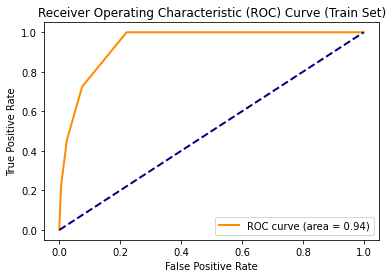

Train Set Metrics:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      2400
           1       0.71      0.46      0.55       312

    accuracy                           0.92      2712
   macro avg       0.82      0.72      0.75      2712
weighted avg       0.91      0.92      0.91      2712

Train Precision: 0.7065
Train Recall: 0.4551
Train F1-score: 0.5536
Train AUC: 0.9419

ROC for Validation Set:


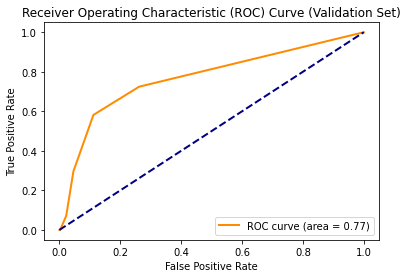

Validation Set Metrics:
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       806
           1       0.44      0.30      0.35        98

    accuracy                           0.88       904
   macro avg       0.68      0.63      0.64       904
weighted avg       0.87      0.88      0.87       904

Validation Precision: 0.4394
Validation Recall: 0.2959
Validation F1-score: 0.3537
Validation AUC: 0.7685

ROC for Test Set:


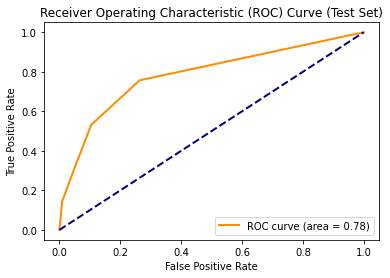

Test Set Metrics:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       794
           1       0.47      0.32      0.38       111

    accuracy                           0.87       905
   macro avg       0.69      0.63      0.65       905
weighted avg       0.85      0.87      0.86       905

Test Precision: 0.4667
Test Recall: 0.3153
Test F1-score: 0.3763
Test AUC: 0.7825


In [51]:
model_without_CV(dataset_name, class_variable)

## 14. Applying and Evaluating Model with CV

In [52]:
def model_with_CV(dataset_name, class_variable):
    X_train_valid, X_test, y_train_valid, y_test = train_test_split(drop_unselected_features(dataset_name, class_variable).drop(columns=[class_variable]), drop_unselected_features(dataset_name, class_variable)[class_variable], test_size=0.2, random_state=42)
    y_train_valid = pd.Series(y_train_valid).to_frame(name=class_variable)
    y_test = pd.Series(y_test).to_frame(name=class_variable)
    
    X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2

    knn = KNeighborsClassifier(n_neighbors=5)
    k = 5

    kf = KFold(n_splits=k, shuffle=True, random_state=42)

    cv_scores = cross_val_score(knn, X_train_valid, y_train_valid.values.ravel(), cv=kf, scoring='accuracy')  # Example metric: accuracy
    best_score_index = cv_scores.argmax()
    best_knn = KNeighborsClassifier(n_neighbors=5) 
    best_knn.fit(X_train_valid, y_train_valid.values.ravel())

    y_pred_train = best_knn.predict(X_train)
    fpr_train, tpr_train, _ = roc_curve(y_train.values.ravel(), best_knn.predict_proba(X_train)[:, 1])
    auc_train = roc_auc_score(y_train.values.ravel(), best_knn.predict_proba(X_train)[:, 1])
    
    plt.figure()
    plt.plot(fpr_train, tpr_train, color='orange', lw=2, label=f'ROC curve (area = {auc_train:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve (Train Set)')
    plt.legend(loc='lower right')
    plt.show()
    
    print('Train Set Metrics:')
    train_report = classification_report(y_train.values.ravel(), y_pred_train)
    print(train_report)
    
    train_precision = precision_score(y_train.values.ravel(), y_pred_train, average='weighted')
    train_recall = recall_score(y_train.values.ravel(), y_pred_train, average='weighted')
    train_f1 = f1_score(y_train.values.ravel(), y_pred_train, average='weighted')
    print(f'Train Overall Precision: {train_precision:.4f}')
    print(f'Train Overall Recall: {train_recall:.4f}')
    print(f'Train Overall F1-score: {train_f1:.4f}\n')

    y_pred_valid = best_knn.predict(X_valid)
    fpr_valid, tpr_valid, _ = roc_curve(y_valid.values.ravel(), best_knn.predict_proba(X_valid)[:, 1])
    auc_valid = roc_auc_score(y_valid.values.ravel(), best_knn.predict_proba(X_valid)[:, 1])

    plt.figure()
    plt.plot(fpr_valid, tpr_valid, color='orange', lw=2, label=f'ROC curve (area = {auc_valid:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve (Validation Set)')
    plt.legend(loc='lower right')
    plt.show()

    print('Validation Set Metrics:')
    valid_report = classification_report(y_valid.values.ravel(), y_pred_valid)
    print(valid_report)

    valid_precision = precision_score(y_valid.values.ravel(), y_pred_valid, average='weighted')
    valid_recall = recall_score(y_valid.values.ravel(), y_pred_valid, average='weighted')
    valid_f1 = f1_score(y_valid.values.ravel(), y_pred_valid, average='weighted')
    print(f'Validation Overall Precision: {valid_precision:.4f}')
    print(f'Validation Overall Recall: {valid_recall:.4f}')
    print(f'Validation Overall F1-score: {valid_f1:.4f}\n')

    y_pred_test = best_knn.predict(X_test)
    fpr_test, tpr_test, _ = roc_curve(y_test.values.ravel(), best_knn.predict_proba(X_test)[:, 1])
    auc_test = roc_auc_score(y_test.values.ravel(), best_knn.predict_proba(X_test)[:, 1])

    plt.figure()
    plt.plot(fpr_test, tpr_test, color='orange', lw=2, label=f'ROC curve (area = {auc_test:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve (Test Set)')
    plt.legend(loc='lower right')
    plt.show()

    print('Test Set Metrics:')
    test_report = classification_report(y_test.values.ravel(), y_pred_test)
    print(test_report)
    
    test_precision = precision_score(y_test.values.ravel(), y_pred_test, average='weighted')
    test_recall = recall_score(y_test.values.ravel(), y_pred_test, average='weighted')
    test_f1 = f1_score(y_test.values.ravel(), y_pred_test, average='weighted')
    print(f'Test Overall Precision: {test_precision:.4f}')
    print(f'Test Overall Recall: {test_recall:.4f}')
    print(f'Test Overall F1-score: {test_f1:.4f}')

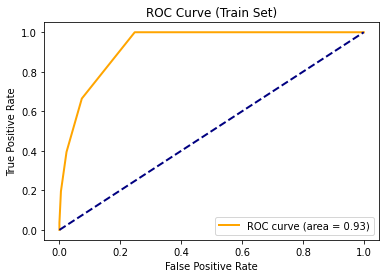

Train Set Metrics:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      2405
           1       0.68      0.39      0.50       307

    accuracy                           0.91      2712
   macro avg       0.81      0.69      0.73      2712
weighted avg       0.90      0.91      0.90      2712

Train Overall Precision: 0.8991
Train Overall Recall: 0.9108
Train Overall F1-score: 0.9000



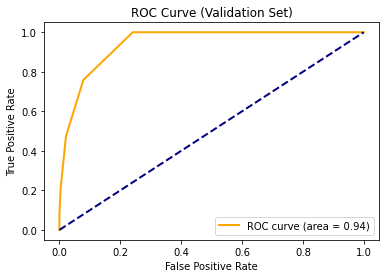

Validation Set Metrics:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       788
           1       0.76      0.47      0.59       116

    accuracy                           0.91       904
   macro avg       0.85      0.73      0.77       904
weighted avg       0.91      0.91      0.90       904

Validation Overall Precision: 0.9058
Validation Overall Recall: 0.9137
Validation Overall F1-score: 0.9048



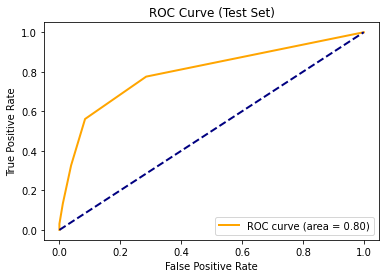

Test Set Metrics:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       807
           1       0.51      0.33      0.40        98

    accuracy                           0.89       905
   macro avg       0.71      0.64      0.67       905
weighted avg       0.88      0.89      0.88       905

Test Overall Precision: 0.8768
Test Overall Recall: 0.8928
Test Overall F1-score: 0.8823


In [53]:
model_with_CV(dataset_name, class_variable)

## 15. Summary of Model Results

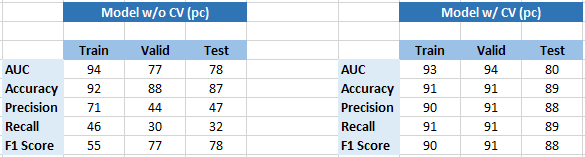

### 15.1. Interpretation with more focus on With CV Test Set metrics

First observation is that the model performs well in the training set and subsequently the performance deteriorates in the validation and test sets. 

Second, it is clear that cross validation has helped improve the model performance. 

Metrics of accuracy, recall, precision, f1-score and AUC will be explained through the with CV Test set numbers as follows:

1) **Accuracy:** The model correctly predicts clients who either will and won't subscribe to a term deposit 89% of the time. Although this is good accuracy, it may be misleading because of class variable is imbalanced. Majority customers did not subscribe. 

2) **Recall:** The overall recall is also 89%. However, the recall for subscribing is 33% which means that of all actual subscription instances in the test set, the model correctly predicted 33% of them and missed 67%. 

3) **Precision:** The overall precision was 88% but the precision for subscription is 51%. This means that of all the instances predicted as having subscribed, 51% of them were actually subscribers. 

4) **F1-Score:** The overall f1-score is 88% but for the class 1 it is 40% which implies that the accuracy of predicting the subscription correctly is moderate. 

5) **AUC:** The probability that the model predicts a subscription than a non-subscription is 80%. 

Note: Of each of the 0,1 classes of the outcome variable, the higher percentage rested with the 0 class owing to the imbalance in the column.

## 16. Complied Master Function

In [56]:
def master_function():
    dataset_name = input('Name of the dataset: ')
    data = read_csv(dataset_name)
    print(dimensions(dataset_name))
    print(data_types(dataset_name))
    preprocess_data(dataset_name)
    print(missing_vals(dataset_name))
    print(descr(dataset_name))
    extract_numeric_cols(dataset_name)
    boxplots(dataset_name)
    print(boxplot_stats(dataset_name))
    class_variable = class_var_name()
    def cols_for_freq_plots():
        columns_list = input('Enter column names separated by commas: ').split(', ')
        return columns_list
    cols_for_freq_plots = cols_for_freq_plots()
    frequency_plots(dataset_name, class_variable, cols_for_freq_plots)
    def cat_cols():
        cat_cols = input('Enter column names separated by commas: ').split(', ')
        return cat_cols
    categorical_cols = cat_cols()
    binary_categorical_barplots(dataset_name, class_variable, categorical_cols)
    normalize_data(dataset_name, class_variable)
    corr_heatmap(dataset_name, class_variable)
    feature_selection_by_corr(dataset_name, class_variable)
    drop_unselected_features(dataset_name, class_variable)
    dimensions2(dataset_name, class_variable)
    tvt_splits_fs(dataset_name, class_variable)
    print(splits_tabulated_fs(dataset_name, class_variable))
    model_without_CV(dataset_name, class_variable)
    model_with_CV(dataset_name, class_variable)

Name of the dataset: bank_marketing.csv
(4521, 17)
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64
           age      job  marital education  default   balance  housing  \
count  4521.00  4521.00  4521.00   4521.00  4521.00   4521.00  4521.00   
mean     41.17     4.41     1.15      1.23     0.02   1422.66     0.57   
std      10.58     3.26     0.60      0.75     0.13   3009.64     0.50   
min      19.00     0.00     0.0

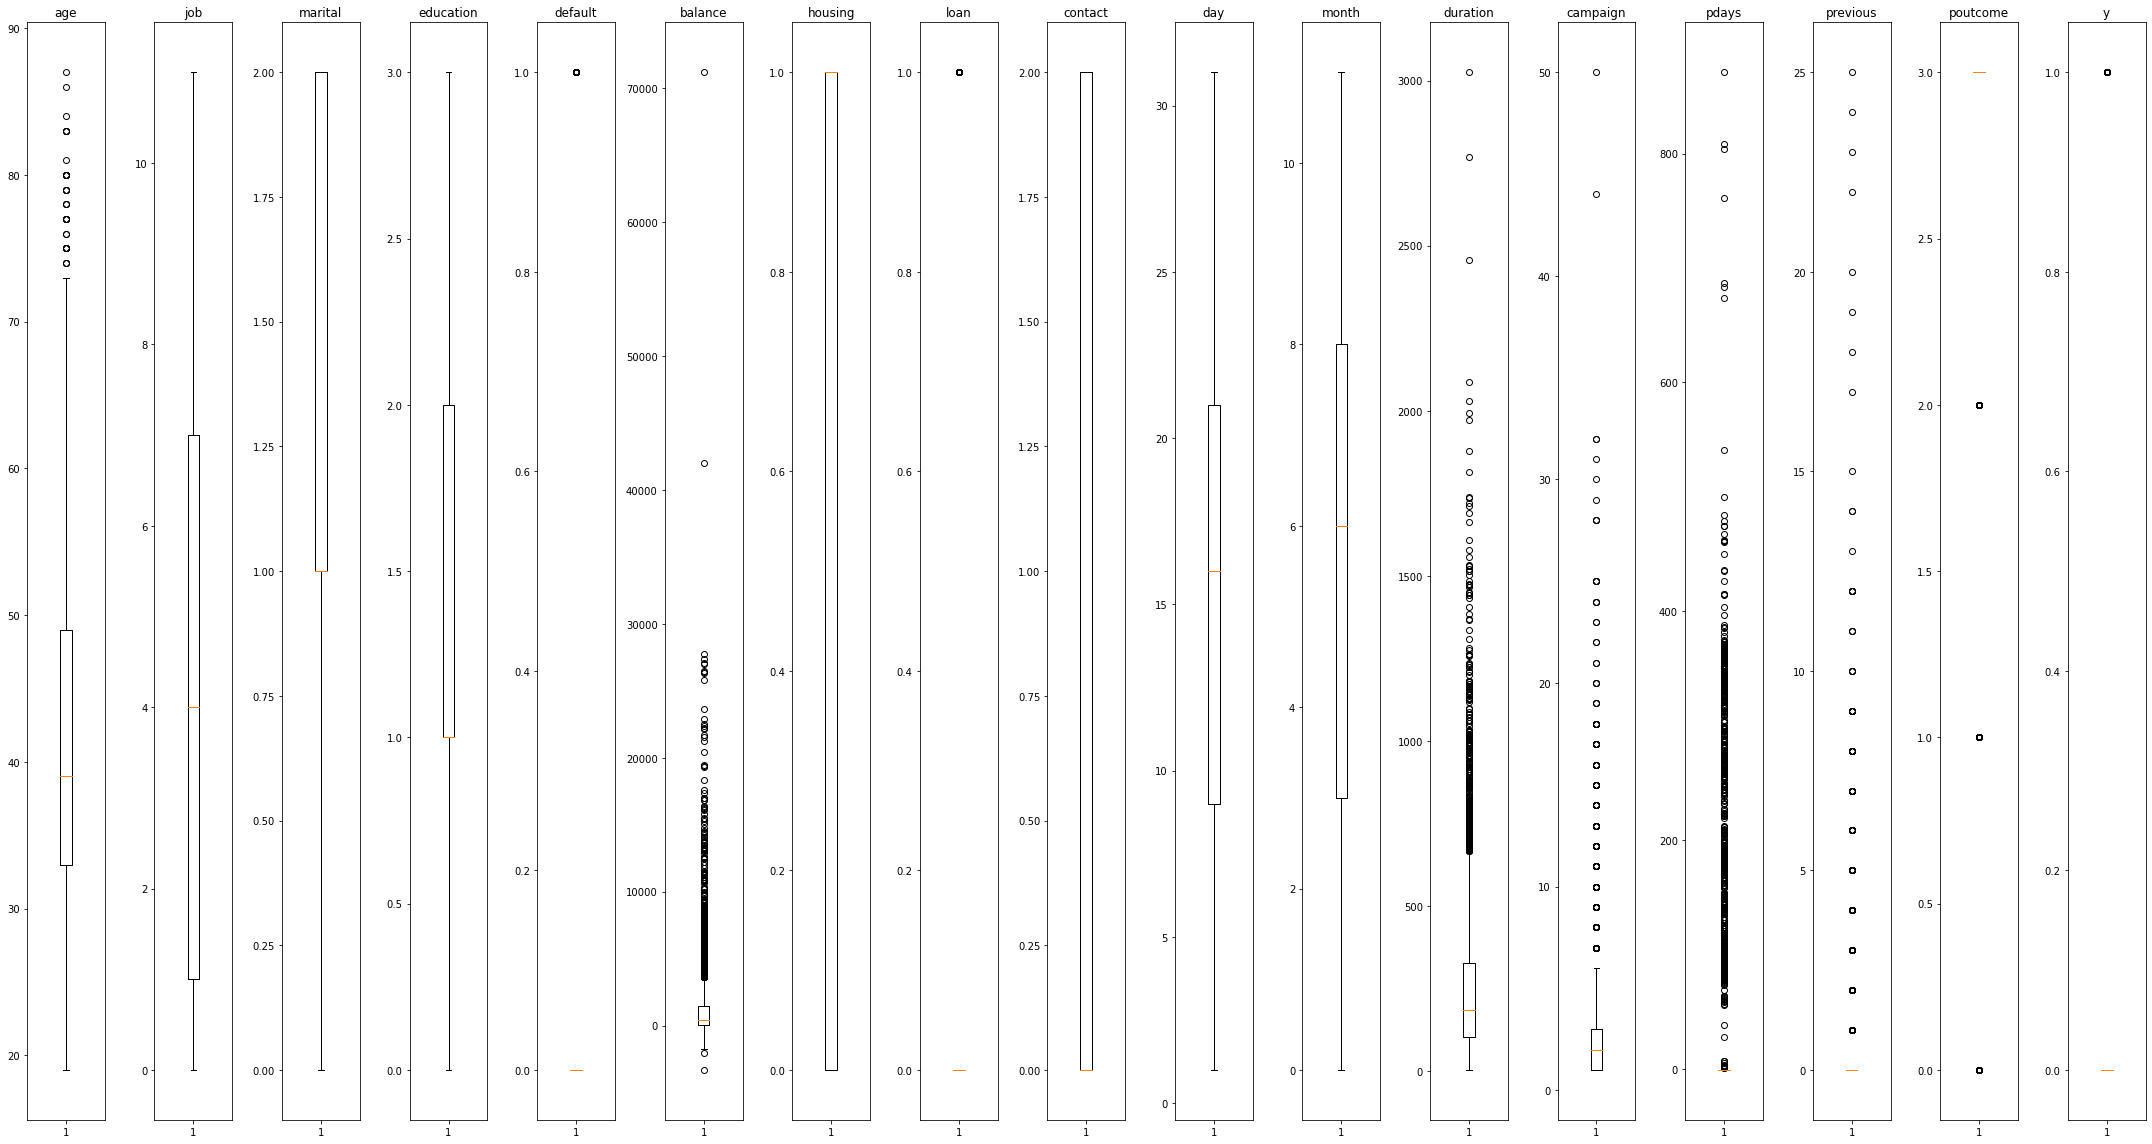

            whisker_low       min      q1      q2       q3 whisker_high  \
column_name                                                               
age                9.00     19.00   33.00   39.00    49.00        73.00   
job               -8.00      0.00    1.00    4.00     7.00        16.00   
marital           -0.50      0.00    1.00    1.00     2.00         3.50   
education         -0.50      0.00    1.00    1.00     2.00         3.50   
default            0.00      0.00    0.00    0.00     0.00         0.00   
balance        -2047.50  -3313.00   69.00  444.00  1480.00      3596.50   
housing           -1.50      0.00    0.00    1.00     1.00         2.50   
loan               0.00      0.00    0.00    0.00     0.00         0.00   
contact           -3.00      0.00    0.00    0.00     2.00         5.00   
day               -9.00      1.00    9.00   16.00    21.00        39.00   
month             -4.50      0.00    3.00    6.00     8.00        15.50   
duration        -233.50  

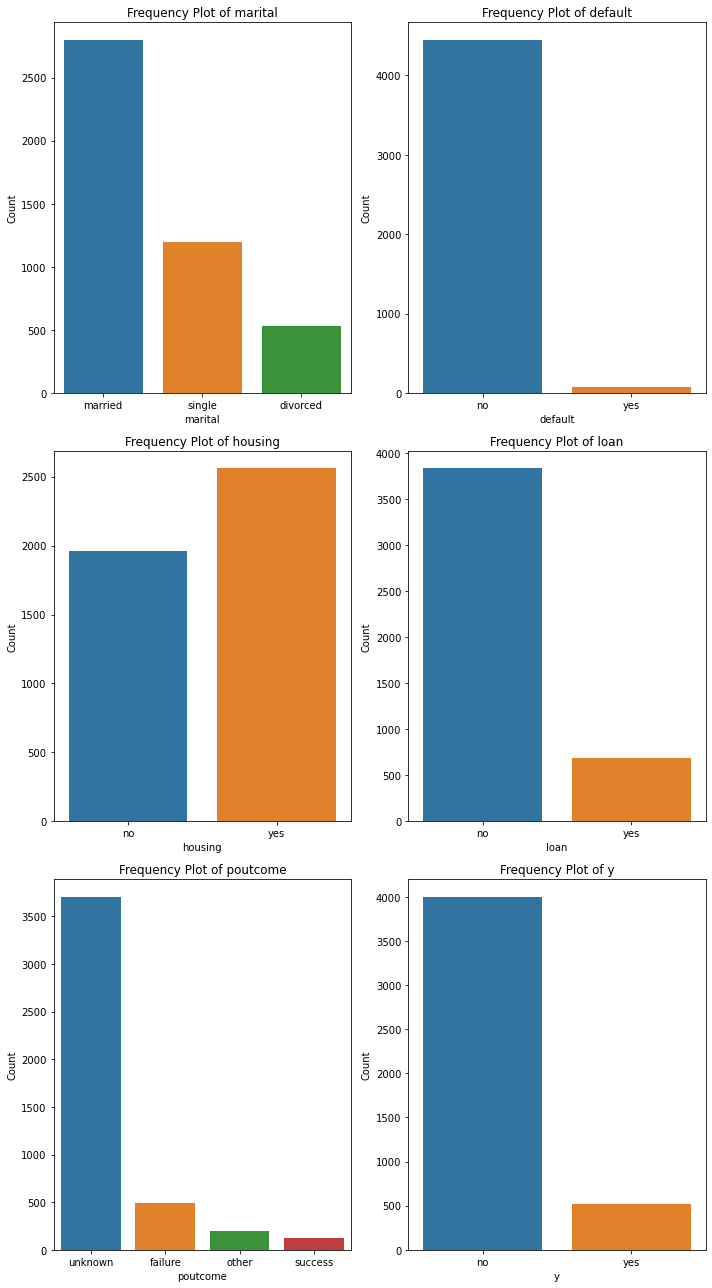

Enter column names separated by commas: default, housing, loan, poutcome


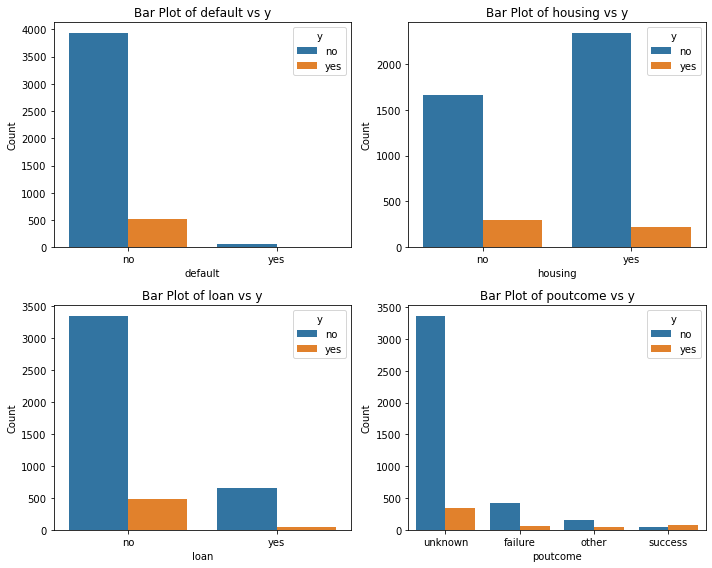

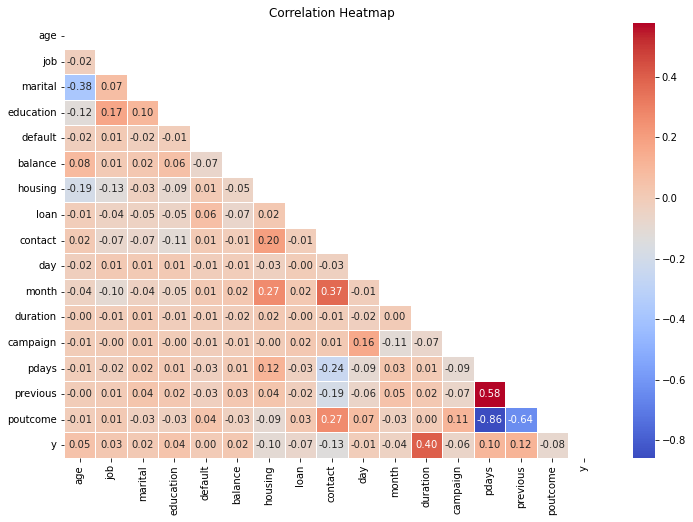

         Rows  Columns
X_train  2712        5
X_valid   904        5
X_test    905        5
y_train  2712        1
y_valid   904        1
y_test    905        1
ROC for Train Set:


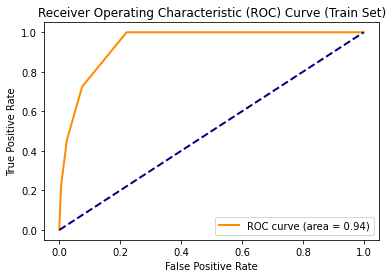

Train Set Metrics:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      2400
           1       0.71      0.46      0.55       312

    accuracy                           0.92      2712
   macro avg       0.82      0.72      0.75      2712
weighted avg       0.91      0.92      0.91      2712

Train Precision: 0.7065
Train Recall: 0.4551
Train F1-score: 0.5536
Train AUC: 0.9419

ROC for Validation Set:


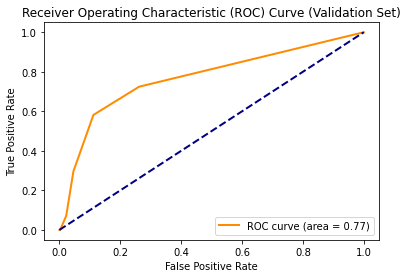

Validation Set Metrics:
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       806
           1       0.44      0.30      0.35        98

    accuracy                           0.88       904
   macro avg       0.68      0.63      0.64       904
weighted avg       0.87      0.88      0.87       904

Validation Precision: 0.4394
Validation Recall: 0.2959
Validation F1-score: 0.3537
Validation AUC: 0.7685

ROC for Test Set:


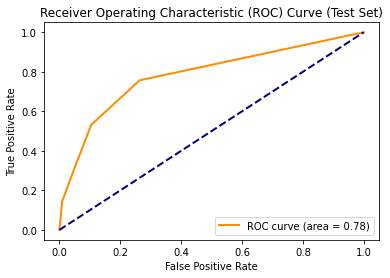

Test Set Metrics:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       794
           1       0.47      0.32      0.38       111

    accuracy                           0.87       905
   macro avg       0.69      0.63      0.65       905
weighted avg       0.85      0.87      0.86       905

Test Precision: 0.4667
Test Recall: 0.3153
Test F1-score: 0.3763
Test AUC: 0.7825


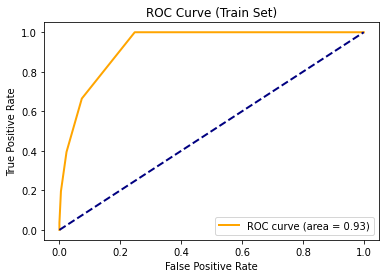

Train Set Metrics:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      2405
           1       0.68      0.39      0.50       307

    accuracy                           0.91      2712
   macro avg       0.81      0.69      0.73      2712
weighted avg       0.90      0.91      0.90      2712

Train Overall Precision: 0.8991
Train Overall Recall: 0.9108
Train Overall F1-score: 0.9000



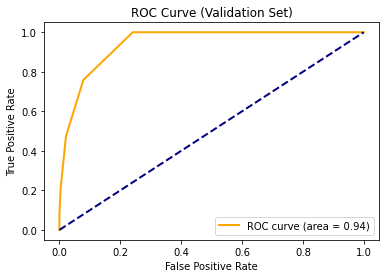

Validation Set Metrics:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       788
           1       0.76      0.47      0.59       116

    accuracy                           0.91       904
   macro avg       0.85      0.73      0.77       904
weighted avg       0.91      0.91      0.90       904

Validation Overall Precision: 0.9058
Validation Overall Recall: 0.9137
Validation Overall F1-score: 0.9048



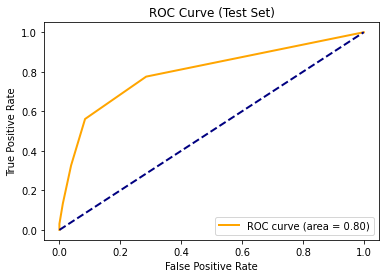

Test Set Metrics:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       807
           1       0.51      0.33      0.40        98

    accuracy                           0.89       905
   macro avg       0.71      0.64      0.67       905
weighted avg       0.88      0.89      0.88       905

Test Overall Precision: 0.8768
Test Overall Recall: 0.8928
Test Overall F1-score: 0.8823


In [57]:
master_function()